In [3]:
# 基础函数库
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 导入逻辑回归模型函数
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.datasets import load_iris

In [5]:
data = load_iris()
# 标签（3类）
iris_target = data.target
# 数据集
iris_features = pd.DataFrame(data=data.data, columns=data.feature_names)
iris_features.head().append(iris_features.tail())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


<Figure size 2700x1800 with 0 Axes>

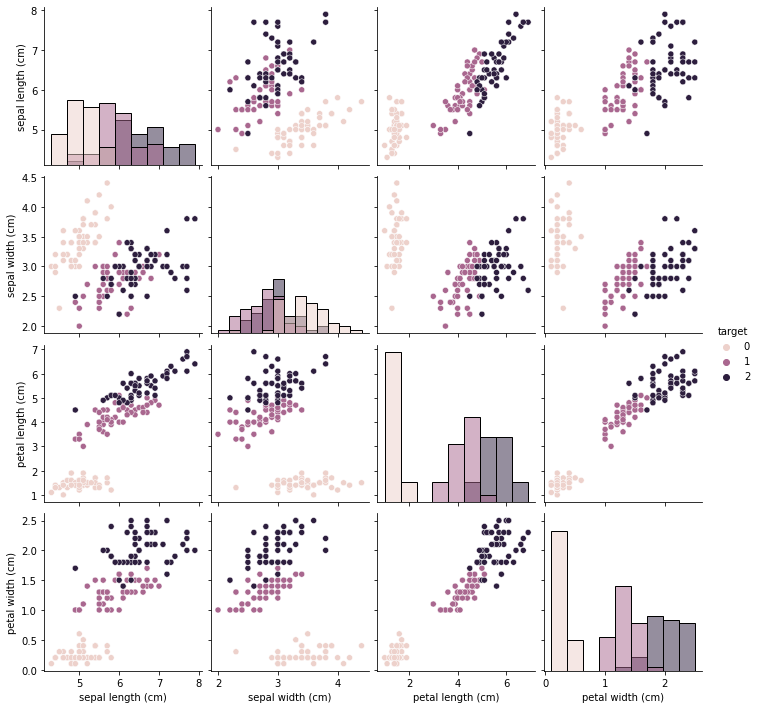

In [6]:
# 浅拷贝，防止在原始数据上修改
iris_all = iris_features.copy()
iris_all['target'] = iris_target

plt.figure(figsize=(9,6), dpi=300)
# 特征与标签组合的散点可视化
sns.pairplot(data=iris_all, diag_kind='hist', hue='target')
plt.show()

## Logistic Regression
> reference:https://cuijiahua.com/blog/2017/11/ml_6_logistic_1.html


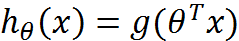
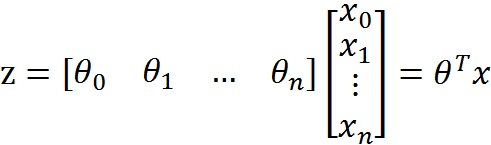
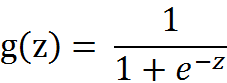
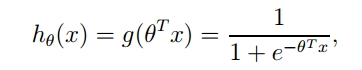

z是一个矩阵，θ是参数列向量(要求解的)，x是样本列向量(给定的数据集)。θ^T表示θ的转置。g(z)函数实现了任意实数到[0,1]的映射，这样我们的数据集([x0,x1,...,xn])，不管是大于1或者小于0，都可以映射到[0,1]区间进行分类。hθ(x)给出了输出为1的概率。比如当hθ(x)=0.7，那么说明有70%的概率输出为1。输出为0的概率是输出为1的补集，也就是30%。

根据sigmoid函数的特性，可以做出如下的假设：
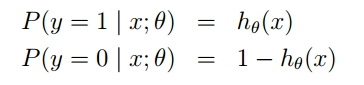
将两个概率公式合并：
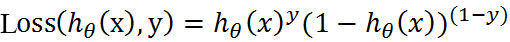
将表达式取对数：
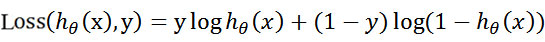
假定样本与样本之间相互独立，那么整个样本集生成的概率即为所有样本生成概率的乘积：
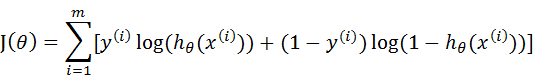
其中，m为样本的总数，y(i)表示第i个样本的类别，x(i)表示第i个样本，需要注意的是θ是多维向量，x(i)也是多维向量。

综上所述，满足J(θ)的最大的θ值即需要求解的模型。


### 梯度上升算法
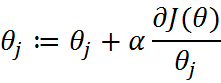
现在只要求出J(θ)的偏导，就可以利用梯度上升算法，求解J(θ)的极大值了。
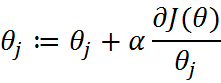
其中第一部分：
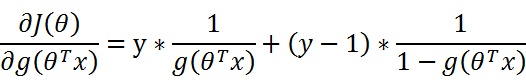
第二部分：
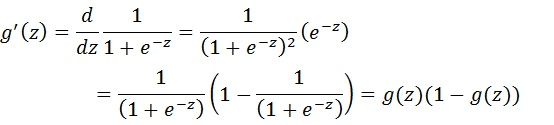
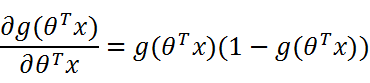
第三部分：

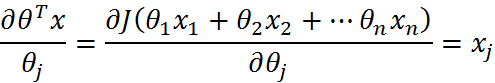
综上所述：
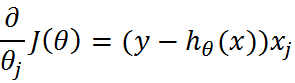
梯度上升迭代公式：
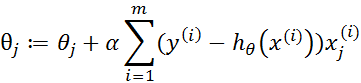
向量化：
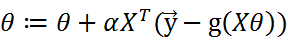

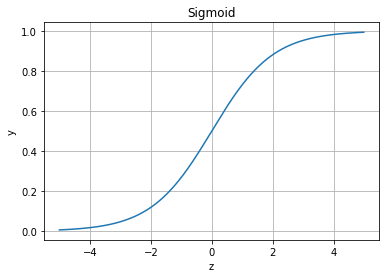

In [23]:
# Sigmoid
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-5,5,0.01)
y = 1/(1+np.exp(-x))

plt.plot(x,y)
plt.title('Sigmoid')
plt.xlabel('z')
plt.ylabel('y')
plt.grid()
plt.show()

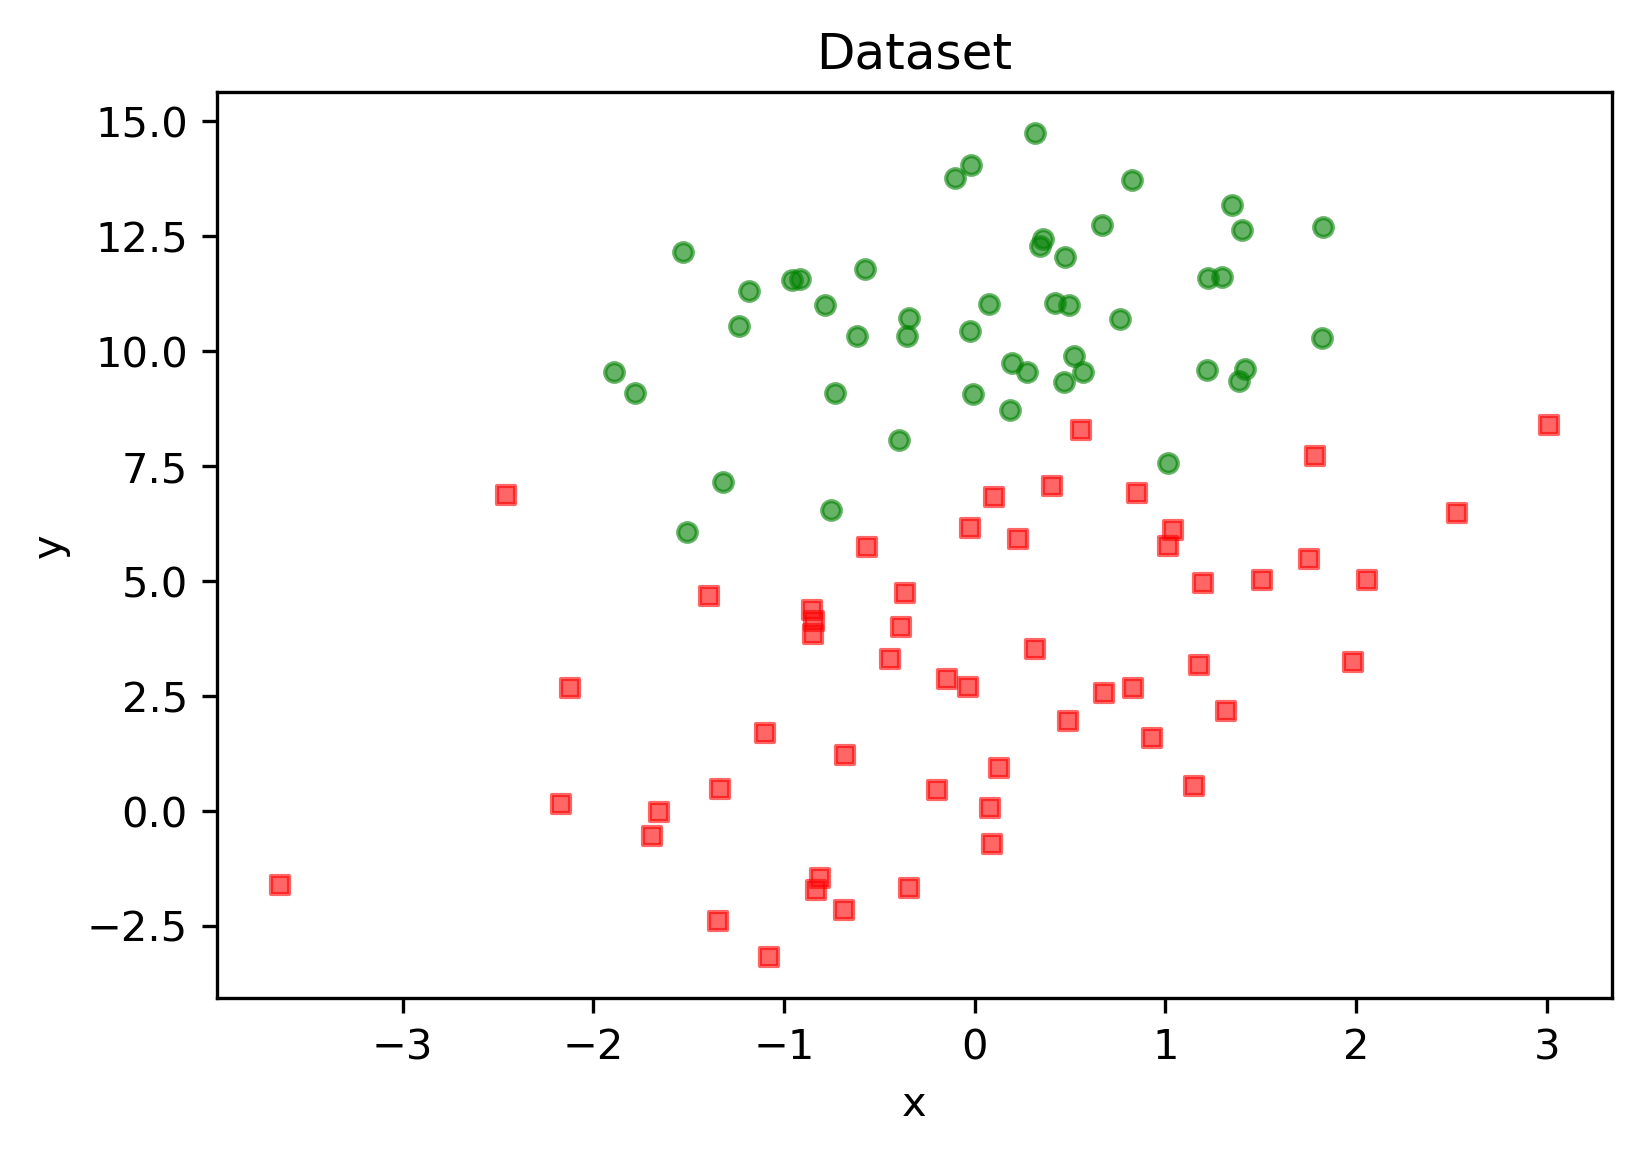

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]
(60,) (60,)


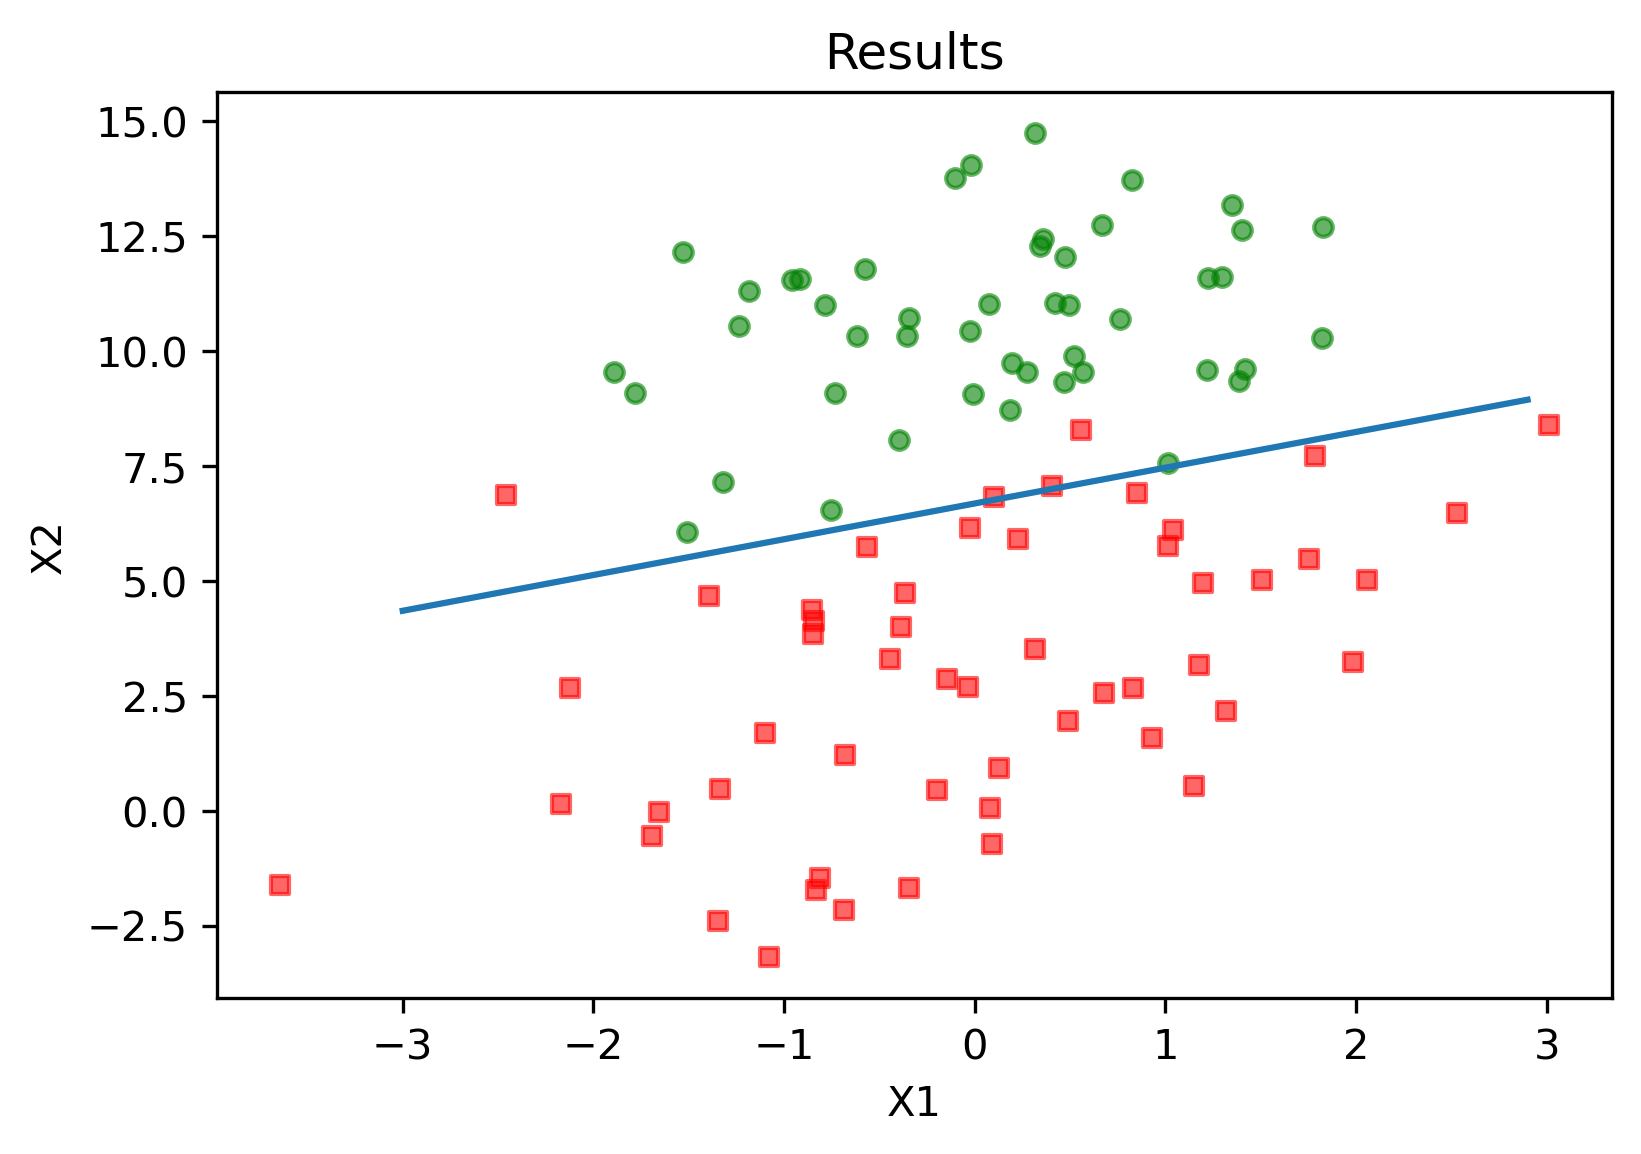

In [7]:
# def LogisticRegression()

def loadDataset(filepath):
    X = []
    Y = []
    datafile = open(filepath)
    lines = datafile.readlines()
    for line in lines:
        lineArray = line.strip().split()
        X.append([1.0, float(lineArray[0]), float(lineArray[1])])
        Y.append(int(lineArray[2]))
    datafile.close()
    
    return X, Y

def plotDataset(X, Y, hyperplane=False, weights=None):
    """
    按照第一维特征进行可视化（2D plot）
    Params:
        weights:训练好的权重，用于绘制决策边界
    """
    X = np.array(X)
    # 样本个数
    cols = X.shape[0]
    # 正样本
    x1 = []; y1 = []
    # 负样本
    x2 = []; y2 = []
    
    for i in range(cols):
        if int(Y[i] == 1):
            x1.append(X[i, 1]); y1.append(X[i, 2])
        else:
            x2.append(X[i, 1]); y2.append(X[i, 2])
    figure = plt.figure(dpi=300)
    ax = figure.add_subplot(111)
    ax.scatter(x1, y1, s=20, c='red', marker='s', alpha=0.6)
    ax.scatter(x2, y2, s=20, c='green', alpha=0.6)
    plt.title('Dataset')
    plt.xlabel('x')
    plt.ylabel('y')
    
    # 如果需要绘制决策边界，则执行如下操作
    if hyperplane:
        x = np.arange(-3.0, 3.0, 0.1) # shape=(60,)
        y = np.array((-weights[0] - weights[1] * x) / weights[2]).reshape(-1, )
        print(x.shape,y.shape)
        ax.plot(x, y)
        plt.title('Results')
        plt.xlabel('X1'); plt.ylabel('X2')                       

    plt.show()
    
def sigmoid(X):
    return 1.0 / (1 + np.exp(-X))

def gradAscent(trainX, trainY, return_weights_only=True, alpha=0.001, epochs=500):
    """
    Params:
        trainX:样本
        trainY:样本标签
        alpha:学习率
        epochs:训练轮数
        weights:求得的回归系数数组(最优参数θ)
    """
    # 将输入数据格式化为矩阵
    xMatrix = np.mat(trainX)
    yMatrix = np.mat(trainY).T
    # 得到训练集的样本个数rows和特征数cols
    rows, cols = np.shape(trainX)
    # 初始化权重
    weights = np.ones((cols, 1))
    # 权重迭代变化值
    weights_array = np.array([])
    # 迭代循环
    for epoch in range(epochs):
        h = xMatrix * weights
        y_pred = sigmoid(h)
        error = yMatrix - y_pred
        w_grad = xMatrix.T.dot(error)
        weights = weights + alpha * w_grad
        weights_array = np.append(weights_array, weights)
    weights_array = weights_array.reshape(epochs, cols)
    
    if return_weights_only:
        return weights
    else:
        return weights, weights_array

if __name__ == '__main__':
    filepath = 'dataset/TestBinaryData.txt'
    X, Y = loadDataset(filepath)
    plotDataset(X, Y)
    w = gradAscent(X, Y)
    print(w)
    plotDataset(X, Y, True, w)

In [8]:
np.array(np.arange(-3.0, 3.0, 0.1)).reshape(1, -1).shape

(1, 60)

In [9]:
np.arange(-3.0, 3.0, 0.1)

array([-3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01,  2.66453526e-15,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,
        1.00000000e+00,  1.10000000e+00,  1.20000000e+00,  1.30000000e+00,
        1.40000000e+00,  1.50000000e+00,  1.60000000e+00,  1.70000000e+00,
        1.80000000e+00,  1.90000000e+00,  2.00000000e+00,  2.10000000e+00,
        2.20000000e+00,  

### 改进的梯度上升算法（随机梯度上升）

假设，数据集一共有100个样本。那么，X就是一个100*3的矩阵。每次计算h的时候，都要计算 X*weights这个矩阵乘法运算，要进行100*3次乘法运算和100*2次加法运算。同理，更新回归系数(最优参数)weights时，也需要用到整个数据集，要进行矩阵乘法运算。总而言之，该方法处理100个左右的数据集时尚可，但如果有数十亿样本和成千上万的特征，那么该方法的计算复杂度就太高了。因此，需要对算法进行改进，每次更新回归系数(最优参数)时，只用一个样本点去更新，这样就可以有效减少计算量，这种方法叫做**随机梯度上升算法**。

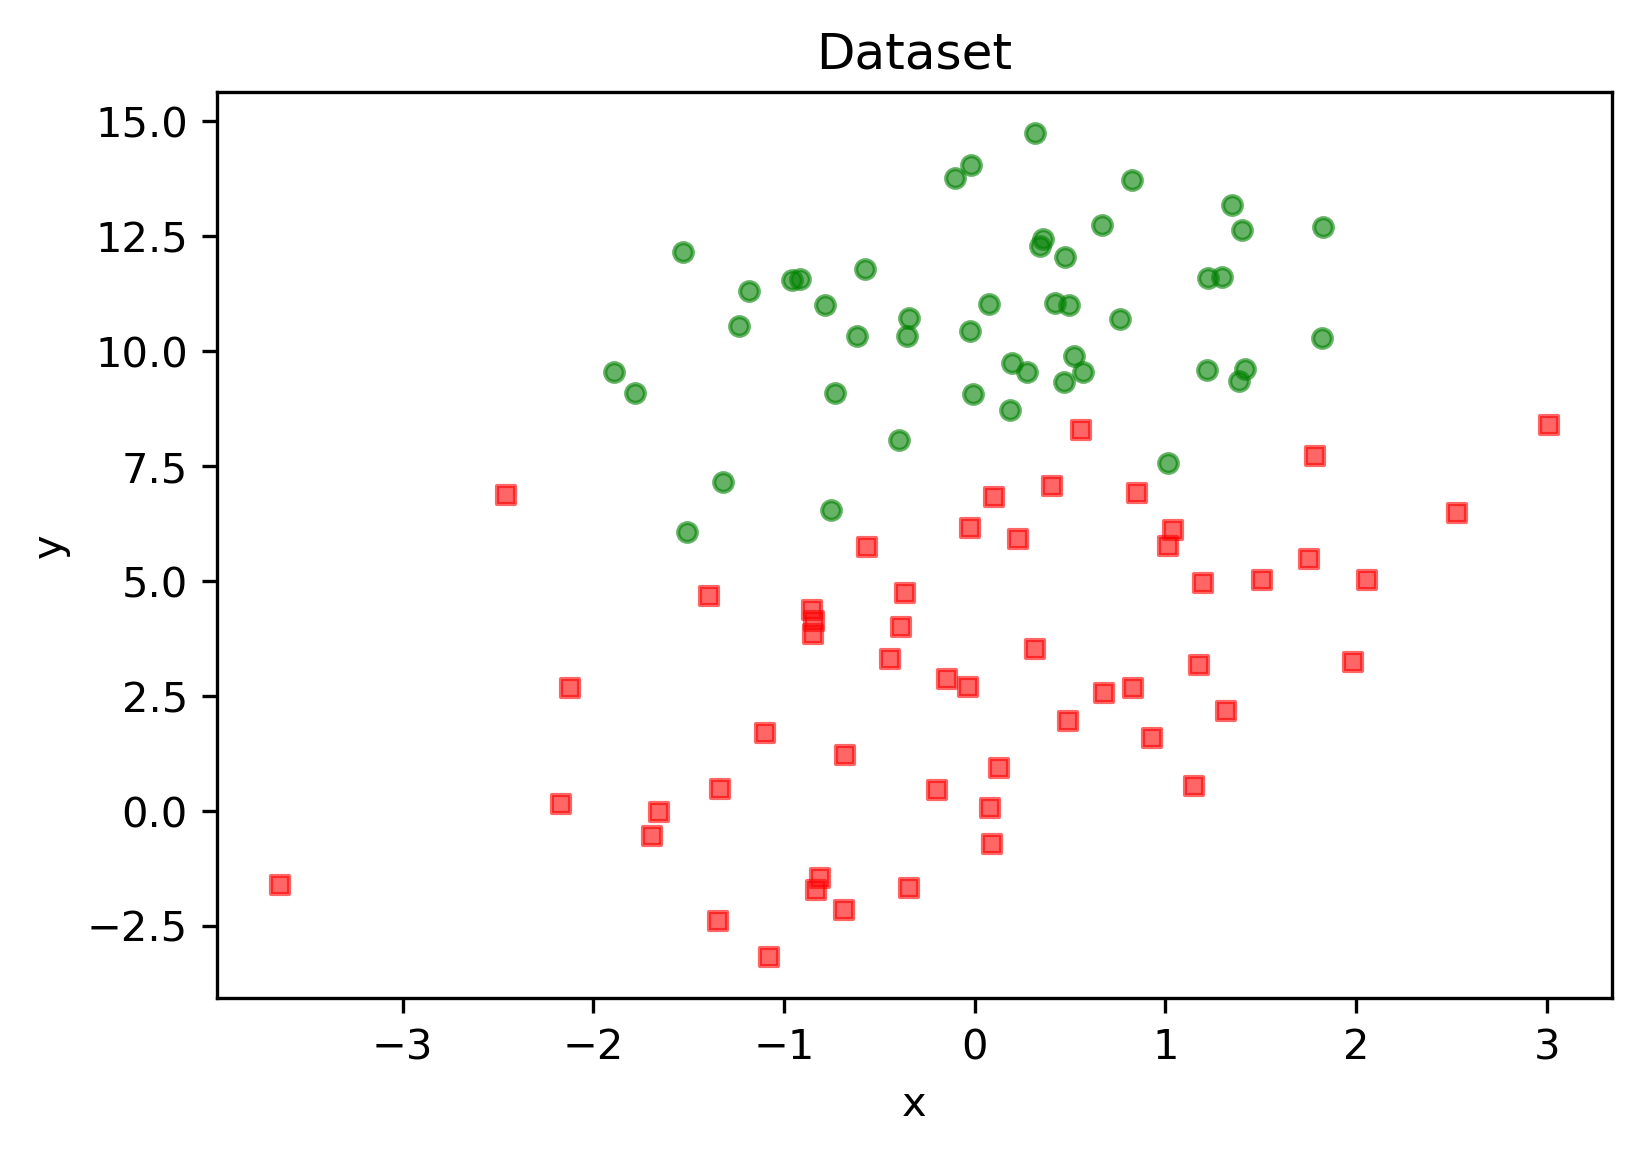

[15.5763718   1.08321513 -2.04217768]
(60,) (60,)


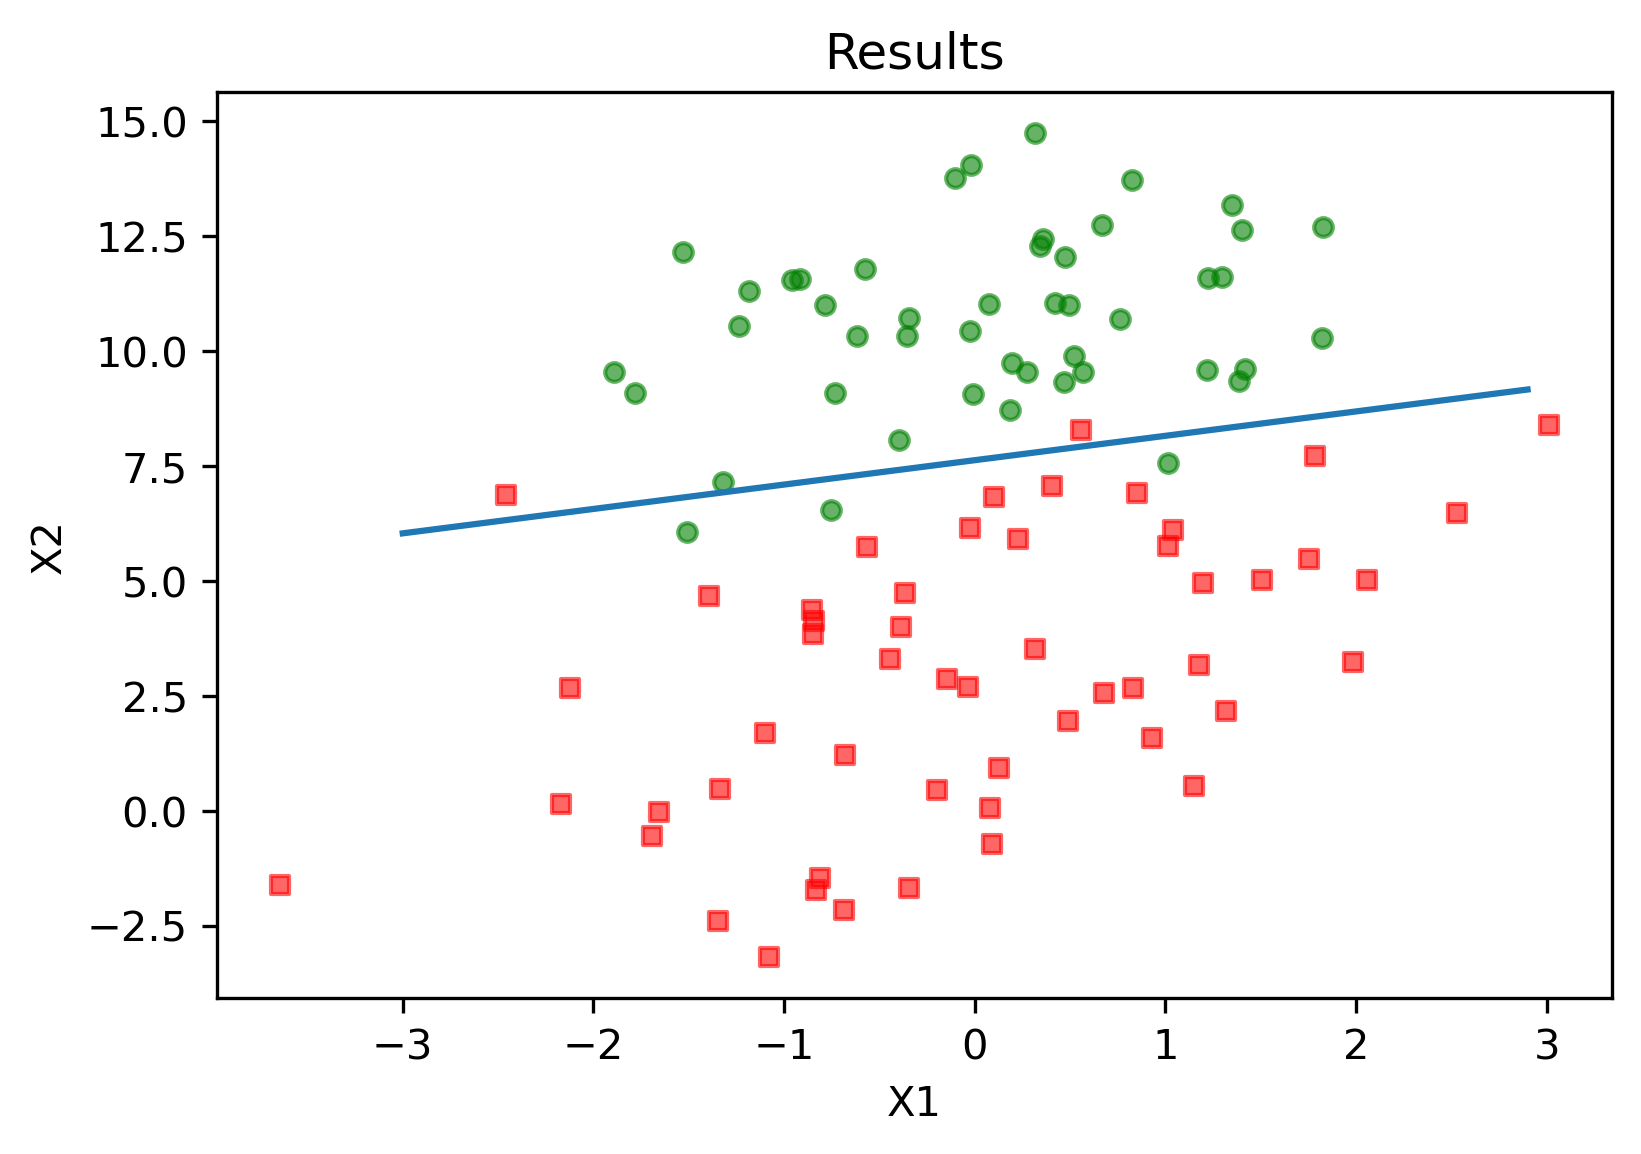

In [10]:
import random

def stocGradAscent(trainX, trainY, return_weights_only=True, alpha=0.001, n_iter=200):
    """
    Params:
        trainX:样本
        trainY:样本标签
        alpha:学习率
        n_iter:迭代次数
        weights:求得的回归系数数组(最优参数θ)
        return_weights_only:仅返回权重系数，不返回迭代更新过程中权重的变化
    """
    X = np.array(trainX)
    Y = np.array(trainY)
    # 得到训练集的样本个数rows和特征数cols
    rows, cols = np.shape(trainX)
    # 初始化权重
    weights = np.ones(cols)
    # 存储每次更新的回归系数
    weights_array = np.array([])
    # 迭代循环
    for j in range(n_iter):
        # 生成样本索引
        xIndex = list(range(rows))
        for i in range(rows):
            # 降低alpha的大小，每次减小1/(j+i)
            alpha = 4/(1.0+j+i) + 0.01
            # 随机选取一个样本
            randIndex = int(random.uniform(0, len(xIndex))) # 随机索引
            randX = X[randIndex] # 随机样本
            randY = Y[randIndex] # 随机样本标签
            # 随机选取一个样本，计算h
            h = sum(randX * weights)
            y_pred = sigmoid(h)
            error = randY - y_pred
            # 计算梯度
            w_grad = error * randX
            weights = weights + alpha * w_grad
            
            if not return_weights_only:
                # 添加回归系数到数组
                weights_array = np.append(weights_array, weights, axis=0)
                # 删除已经使用的样本

            del (xIndex[randIndex])

    if not return_weights_only:
        # 重塑权重存储数组维度
        weights_array = weights_array.reshape(n_iter * rows, cols)
        return weights, weights_array
    else:
        return weights

if __name__ == '__main__':
    filepath = 'dataset/TestBinaryData.txt'
    X, Y = loadDataset(filepath)
    plotDataset(X, Y)
    w, w_array = stocGradAscent(X, Y, return_weights_only=False)
    print(w)
    plotDataset(X, Y, hyperplane=True, weights=w)

该算法第一个改进：alpha在每次迭代的时候都会调整，虽然alpha会随着迭代次数不断减小，但永远不会减小到0，因为有一个常数项。这样做的原因是为了保证在多次迭代之后，新数据仍然具有一定的影响在降低alpha的函数中，alpha每次减少1/(j+i)，其中j是迭代次数，i是样本点的下标。

第二个改进：更新回归系数(最优参数)时，只使用一个样本点，并且选择的样本点是随机的，每次迭代不使用已经用过的样本点。这样的方法，就有效地减少了计算量，并保证了回归效果。

### 回归系数与迭代次数的关系
为看到每个回归方法的收敛情况，编写程序，绘制出回归系数和迭代次数的关系曲线。

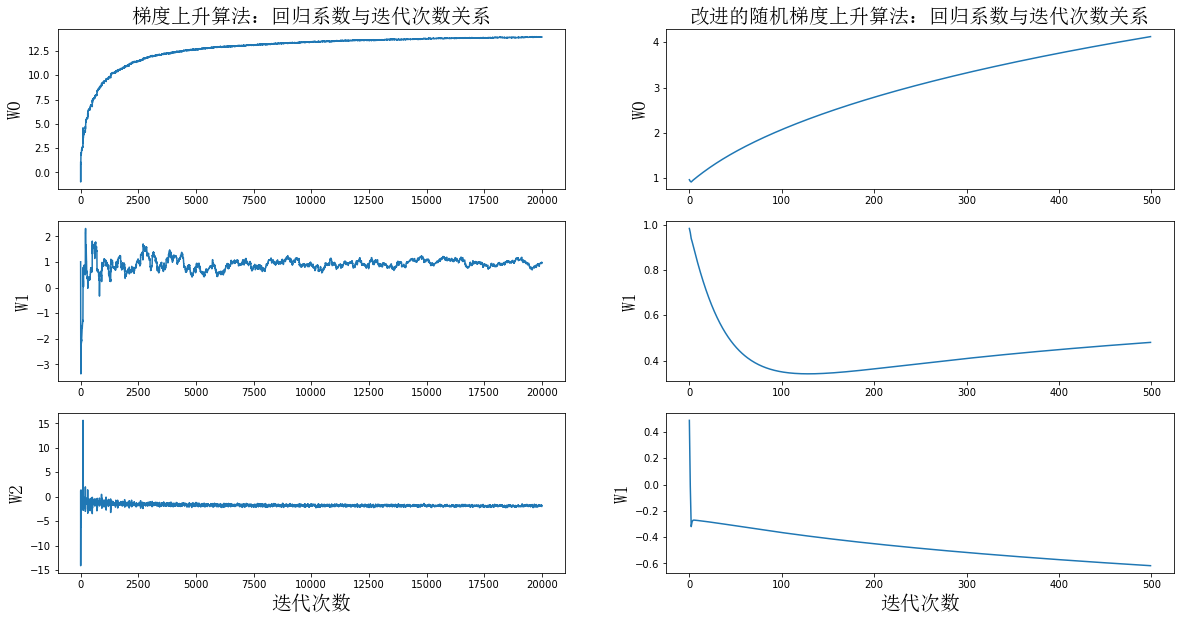

In [11]:
from matplotlib.font_manager import FontProperties

def plotWeights(weights_array1,weights_array2):
    """
    绘制回归系数与迭代次数的关系
    """
    # 设置中文格式
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    
    # 将fig画布分隔成1行1列,不共享x轴和y轴
    # 当nrow=3,nclos=2时,代表fig画布被分为六个区域,axs[0][0]表示第一行第一列
    fig, axs = plt.subplots(nrows=3, ncols=2, sharex=False, sharey=False, figsize=(20,10))
    x1 = np.arange(0, len(weights_array1), 1)
    
    # 绘制w0与迭代次数的关系
    axs[0][0].plot(x1, weights_array1[:,0])
    axs0_title_text = axs[0][0].set_title(u'梯度上升算法：回归系数与迭代次数关系', fontproperties=font)
    axs0_ylabel_text = axs[0][0].set_ylabel(u'W0', fontproperties=font)
    plt.setp(axs0_title_text, size=20, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=20, weight='bold', color='black')
    
    # 绘制w1与迭代次数的关系
    axs[1][0].plot(x1, weights_array1[:,1])
    axs1_ylabel_text = axs[1][0].set_ylabel(u'W1', fontproperties=font)
    plt.setp(axs1_ylabel_text, size=20, weight='bold', color='black')
    
    # 绘制w2与迭代次数的关系
    axs[2][0].plot(x1, weights_array1[:,2])
    axs2_xlabel_text = axs[2][0].set_xlabel(u'迭代次数', fontproperties=font)
    axs2_ylabel_text = axs[2][0].set_ylabel(u'W2', fontproperties=font)
    plt.setp(axs2_xlabel_text, size=20, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=20, weight='bold', color='black')
    
    
    x2 = np.arange(0, len(weights_array2), 1)
    #绘制w0与迭代次数的关系
    axs[0][1].plot(x2,weights_array2[:,0])
    axs0_title_text = axs[0][1].set_title(u'改进的随机梯度上升算法：回归系数与迭代次数关系', fontproperties=font)
    axs0_ylabel_text = axs[0][1].set_ylabel(u'W0', fontproperties=font)
    plt.setp(axs0_title_text, size=20, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=20, weight='bold', color='black')
    
    #绘制w1与迭代次数的关系
    axs[1][1].plot(x2,weights_array2[:,1])
    axs1_ylabel_text = axs[1][1].set_ylabel(u'W1', fontproperties=font)
    plt.setp(axs1_ylabel_text, size=20, weight='bold', color='black')
    
    #绘制w2与迭代次数的关系
    axs[2][1].plot(x2,weights_array2[:,2])
    axs2_xlabel_text = axs[2][1].set_xlabel(u'迭代次数',  fontproperties=font)
    axs2_ylabel_text = axs[2][1].set_ylabel(u'W1',  fontproperties=font)
    plt.setp(axs2_xlabel_text, size=20, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=20, weight='bold', color='black')

    plt.show()

w1, w_array1 = stocGradAscent(X, Y, return_weights_only=False)
w2, w_array2 = gradAscent(X, Y, return_weights_only=False)

plotWeights(w_array1, w_array2)

改进的随机梯度上升算法，在遍历数据集的第20次开始收敛。而梯度上升算法，在遍历数据集的第300次才开始收敛

### 从疝气病症状预测病马的死亡率
数据包含368个样本和28个特征。这种病不一定源自马的肠胃问题，其他问题也可能引发马疝病。该数据集中包含了医院检测马疝病的一些指标，有的指标比较主观，有的指标难以测量，例如马的疼痛级别。

除了部分指标主观和难以测量外，该数据还存在一个问题，数据集中有30%的值是缺失的。下面将首先介绍如何处理数据集中的数据缺失问题，然后再利用Logistic回归和随机梯度上升算法来预测病马的生死。

因为有时候数据相当昂贵，扔掉和重新获取都是不可取的，所以必须采用一些方法来解决这个问题。下面给出了一些可选的做法：

- 使用可用特征的均值来填补缺失值；
- 使用特殊值来填补缺失值，如-1；
- 忽略有缺失值的样本；
- 使用相似样本的均值添补缺失值；
- 使用另外的机器学习算法预测缺失值。

---

预处理数据做两件事：

- 如果测试集中一条数据的特征值已经确实，那么选择实数0来替换所有缺失值，因此这不会影响Logistic回归系数的值。sigmoid(0)=0.5，即它对结果的预测不具有任何倾向性。

- 如果测试集中一条数据的类别标签已经缺失，那么将该类别数据丢弃，因为类别标签与特征不同，很难确定采用某个合适的值来替换。

原始的数据集经过处理，保存为两个文件：horseColicTest.txt和horseColicTraining.txt。已经处理好的“干净”可用的数据集下载地址：
[dataset](https://github.com/Jack-Cherish/Machine-Learning/tree/master/Logistic)

In [12]:
from numpy import exp
from scipy.special import expit

# # 警告：RuntimeWarning: overflow encountered in exp return 1.0 / (1+exp(-X))
# def sigmoid(X):
#     if X.any() >= 0:
#         return 1.0 / (1+exp(-X))
#     else:
#         return exp(X) / (1+exp(X))

# 改正
def sigmoid(X):
    return expit(X)

def classifyVector(sample, weights, activation=sigmoid, threshold=0.5):
    """
    根据训练好的权重向量，对输入样本sample根据阈值，进行分类
    """
    y_pred = activation(sum(sample * weights))
    if y_pred > threshold:
        return 1.0
    else:
        return 0.0

def colicTest(method='GD'):
    """
    使用训练集训练，之后使用得到的权重在测试集上测试，并返回准确率
    Params:
        method:使用哪种方式，梯度下降or随机梯度下降
    """
    trainData = open('horseColicTraining.txt')
    testData = open('horseColicTest.txt')
    X = []
    Y = []
    for line in trainData.readlines():
        # 读取一行，原始数据集中使用tab对元素之间进行间隔
        currLine = line.strip().split('\t')
        # 定义一个列表，用于保存当前行的特征数据
        lineArr = []
        # 遍历当前这一行，并将响应的特征数据添加到对应的训练集数组存储
        # 减一是因为python索引从0开始
        for i in range(len(currLine) - 1):
            lineArr.append(float(currLine[i]))
        X.append(lineArr)
        # 每行的最后一个元素为样本标签
        Y.append(float(currLine[-1]))

    X = np.array(X)
    # Y = np.array(Y)

    # 注意，不需要绘制权重变化曲线图时，只需要返回权重即可
    if method == 'GD':
        trainWeights = gradAscent(X, Y, return_weights_only=True)
    if method == 'SGD':
        trainWeights = stocGradAscent(X, Y, return_weights_only=True)

    # 在测试集上测试
    # 定义变量，用于保存分对样本的个数
    trueCount = 0
    # 定义变量，用于保存测试样本的总个数
    testCount = 0

    for line in testData.readlines():
        testCount += 1
        currLine = line.strip().split('\t')
        lineArr = []
        # 将当前行构造成一个样本（数组）
        for i in range(len(currLine) - 1):
            lineArr.append(float(currLine[i]))

        # 对当前样本，根据训练好的权重向量根据阈值进行分类，通过classifyVector函数实现
        lineArr = np.array(lineArr)

        if method == 'SGD':
            test_pred = classifyVector(lineArr, trainWeights)
        else:
            test_pred = classifyVector(lineArr, trainWeights[:, 0])
        true_label = int(currLine[-1])

        if test_pred == true_label:
            trueCount += 1

    # testCount 为float类型
    accuracy = float(trueCount / testCount) * 100
    print("正确率为：%.4f%%" % accuracy)
    
    return accuracy

def multiTest(method='SGD', n_tests=10):
    accArr = []
    accSum = 0.0
    for k in range(n_tests):
        acc = colicTest(method)
        accSum += acc
        accArr.append(acc)
        print("Test ID: {}, Acc: {:.4f}".format(k+1, acc))
    print('-' * 32)
    print("Avg Acc by %d: %.4f%%" %(n_tests, accSum/float(n_tests)))

In [13]:
colicTest(method='GD')

正确率为：71.6418%


71.64179104477611

In [14]:
colicTest(method='SGD')

正确率为：64.1791%


64.17910447761194

In [15]:
multiTest(method='SGD', n_tests=10)

正确率为：61.1940%
Test ID: 1, Acc: 61.1940
正确率为：55.2239%
Test ID: 2, Acc: 55.2239
正确率为：64.1791%
Test ID: 3, Acc: 64.1791
正确率为：50.7463%
Test ID: 4, Acc: 50.7463
正确率为：46.2687%
Test ID: 5, Acc: 46.2687
正确率为：64.1791%
Test ID: 6, Acc: 64.1791
正确率为：68.6567%
Test ID: 7, Acc: 68.6567
正确率为：65.6716%
Test ID: 8, Acc: 65.6716
正确率为：65.6716%
Test ID: 9, Acc: 65.6716
正确率为：68.6567%
Test ID: 10, Acc: 68.6567
--------------------------------
Avg Acc by 10: 61.0448%


### 标准实现方法
> Ref:https://github.com/RRdmlearning/Machine-Learning-From-Scratch

Accuracy: 0.9393939393939394


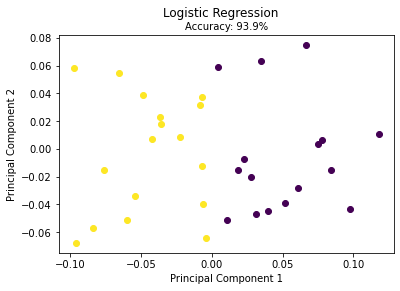

In [16]:
import numpy as np
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# Import helper functions
from utils import make_diagonal, normalize, train_test_split, accuracy_score
from utils import Plot

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


class LogisticRegression():
    """
        Parameters:
        -----------
        n_iterations: int
            梯度下降的轮数
        learning_rate: float
            梯度下降学习率

    """
    def __init__(self, learning_rate=.1, n_iterations=4000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def initialize_weights(self, n_features):
        # 初始化参数
        # 参数范围[-1/sqrt(N), 1/sqrt(N)]
        limit = np.sqrt(1 / n_features)
        w = np.random.uniform(-limit, limit, (n_features, 1)) # * np.sqrt(1. / n_features)
        b = 0
        self.w = np.insert(w, 0, b, axis=0)

    def fit(self, X, y):
        m_samples, n_features = X.shape
        self.initialize_weights(n_features)
        # 为X增加一列特征x1，x1 = 0
        X = np.insert(X, 0, 1, axis=1)
        y = np.reshape(y, (m_samples, 1))

        # 梯度训练n_iterations轮
        for i in range(self.n_iterations):
            h_x = X.dot(self.w)
            y_pred = sigmoid(h_x)
            w_grad = X.T.dot(y_pred - y)
            self.w = self.w - self.learning_rate * w_grad

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        h_x = X.dot(self.w)
        y_pred = np.round(sigmoid(h_x))
        return y_pred.astype(int)

    
def main():
    # Load dataset
    data = datasets.load_iris()
    X = normalize(data.data[data.target != 0])
    y = data.target[data.target != 0]
    y[y == 1] = 0
    y[y == 2] = 1

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, seed=1)

    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred = np.reshape(y_pred, y_test.shape)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Reduce dimension to two using PCA and plot the results
    Plot().plot_in_2d(X_test, y_pred, title="Logistic Regression", accuracy=accuracy)


if __name__ == "__main__":
    main()

### sklearn 库方法
> Ref:https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
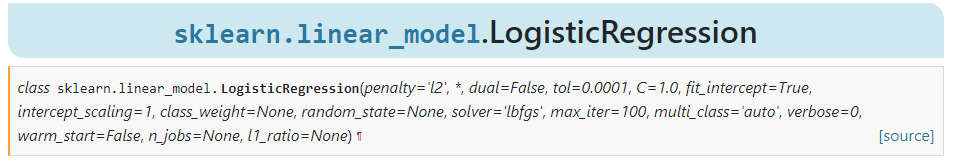



#### 参数说明
- penalty：惩罚项，str类型，默认为l2, {'l1', 'l2', 'elasticnet', 'none'}。用于指定惩罚项中使用的范数。newton-cg、sag和lbfgs求解算法只支持L2惩罚。saga求解器仅支持elasticnet。 如果为 none（liblinear求解器不支持），则不应用任何正则化。L1范数假设模型的参数满足拉普拉斯分布，L2范数假设模型参数满足高斯分布，所谓的范式就是加上对参数的约束，使得模型更不会过拟合(overfit)，加约束的情况下，理论上应该可以获得泛化能力更强的结果。
- dual：对偶或原始方法，bool类型，默认为False。对偶方法只用在求解线性多核(liblinear)的L2惩罚项上。当样本数量>样本特征的时候，dual通常设置为False。
- tol：停止求解的标准，float类型，默认为1e-4。就是求解到多少的时候，停止，认为已经求出最优解。
- c：正则化系数λ的倒数，float类型，默认为1.0。必须是正浮点型数。像SVM一样，越小的数值表示越强的正则化。
- fit_intercept：是否存在截距或偏差，bool类型，默认为True。
- 仅在使用求解器liblinear并将self.fit_intercept设置为True时有用。 在这种情况下，x变为[x，self.intercept_scaling]，即，将常量值等于intercept_scaling的“合成”特征附加到实例向量。 截距变为intercept_scaling * Composite_feature_weight。
- class_weight：用于标示分类模型中各种类型的权重，可以是一个字典或者'balanced'字符串，默认为不输入，也就是不考虑权重，即为None。如果选择输入的话，可以选择balanced让类库自己计算类型权重，或者自己输入各个类型的权重。举个例子，比如对于0,1的二元模型，我们可以定义class_weight={0:0.9,1:0.1}，这样类型0的权重为90%，而类型1的权重为10%。如果class_weight选择balanced，那么类库会根据训练样本量来计算权重。某种类型样本量越多，则权重越低，样本量越少，则权重越高。当class_weight为balanced时，类权重计算方法如下：n_samples / (n_classes * np.bincount(y))。n_samples为样本数，n_classes为类别数量，np.bincount(y)会输出每个类的样本数，例如y=[1,0,0,1,1],则np.bincount(y)=[2,3]。
- random_state：随机数种子，int类型，可选参数，默认为无，仅在正则化优化算法为sag,liblinear时有用。
- solver：优化算法选择参数，只有五个可选参数，即newton-cg,lbfgs,liblinear,sag,saga。默认为liblinear。solver参数决定了我们对逻辑回归损失函数的优化方法，有四种算法可以选择，分别是：
  - liblinear：使用了开源的liblinear库实现，内部使用了坐标轴下降法来迭代优化损失函数。
  - lbfgs：拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
  - newton-cg：也是牛顿法家族的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
  - sag：即随机平均梯度下降，是梯度下降法的变种，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候。
  - saga：线性收敛的随机优化算法的的变重。
- max_iter：算法收敛最大迭代次数，int类型，默认为10。仅在正则化优化算法为newton-cg, sag和lbfgs才有用，算法收敛的最大迭代次数。
- multi_class：分类方式选择参数，str类型，可选参数为ovr和multinomial，默认为ovr。ovr即前面提到的one-vs-rest(OvR)，而multinomial即前面提到的many-vs-many(MvM)。如果是二元逻辑回归，ovr和multinomial并没有任何区别，区别主要在多元逻辑回归上。
- verbose：日志冗长度，int类型。默认为0。就是不输出训练过程，1的时候偶尔输出结果，大于1，对于每个子模型都输出。
- warm_start：热启动参数，bool类型。默认为False。如果为True，则下一次训练是以追加树的形式进行（重新使用上一次的调用作为初始化）。
- n_jobs：并行数。int类型，默认为1。1的时候，用CPU的一个内核运行程序，2的时候，用CPU的2个内核运行程序。为-1的时候，用所有CPU的内核运行程序。如果multi_class =ovr，则在对类进行并行化时使用的CPU内核数。 当求解器设置为 liblinear时，无论是否指定了 multi_class，该参数都将被忽略。
- l1_ratio: Elastic-Net混合参数，0 <= l1_ratio <=1。仅当penalty=elasticnet时使用。 设置l1_ratio = 0等效于使用 penalty='l2'，而设置l1_ratio = 1等效于使用 penalty = 'l1'。 对于0 <l1_ratio <1，惩罚是L1和L2的组合。

In [19]:
from sklearn.linear_model import LogisticRegression

def colicSklearnLR(solver='liblinear',  max_iter=1000):
    """
    使用训练集训练，之后使用得到的权重在测试集上测试，并返回准确率
    Params:
        method:使用哪种方式，梯度下降or随机梯度下降
    """
    trainData = open('horseColicTraining.txt')
    testData = open('horseColicTest.txt')
    X = []
    Y = []
    for line in trainData.readlines():
        # 读取一行，原始数据集中使用tab对元素之间进行间隔
        currLine = line.strip().split('\t')
        # 定义一个列表，用于保存当前行的特征数据
        lineArr = []
        # 遍历当前这一行，并将响应的特征数据添加到对应的训练集数组存储
        # 减一是因为python索引从0开始
        for i in range(len(currLine) - 1):
            lineArr.append(float(currLine[i]))
        X.append(lineArr)
        # 每行的最后一个元素为样本标签
        Y.append(float(currLine[-1]))

    X = np.array(X)
    Y = np.array(Y)
    
    testX = []
    testY = []
    # 在测试集上测试
    for line in testData.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        # 将当前行构造成一个样本（数组）
        for i in range(len(currLine) - 1):
            lineArr.append(float(currLine[i]))
        # 对当前样本，根据训练好的权重向量根据阈值进行分类，通过classifyVector函数实现
        lineArr = np.array(lineArr)
        testX.append(lineArr)
        testY.append(float(currLine[-1]))

    clf = LogisticRegression(solver=solver, max_iter=max_iter)
    
    clf.fit(X, Y)
    
    test_acc = clf.score(testX, testY) * 100

    print("正确率为：%.4f%%" % test_acc)
    
    return test_acc, clf, X, Y

if __name__ == '__main__':
    test_acc, clf, X, Y = colicSklearnLR(solver='sag', max_iter=5000)

正确率为：73.1343%


The confusion matrix result:
 [[ 72  32]
 [ 49 146]]


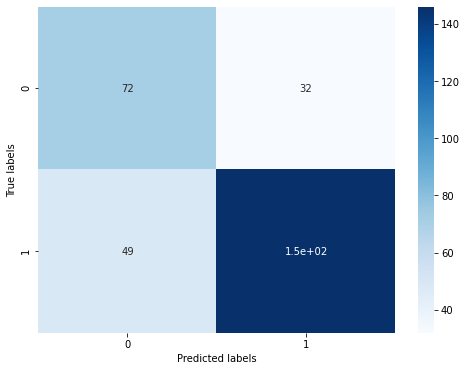

In [21]:
from sklearn import metrics

## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(X)
# test_predict = clf.predict(testX)

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(train_predict, Y)
# confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

## 利用 逻辑回归模型 在三分类(多分类)上 进行训练和预测

In [26]:
from sklearn.model_selection import train_test_split
## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_target, test_size = 0.2, random_state = 2020)

In [27]:
## 定义 逻辑回归模型 
clf = LogisticRegression(random_state=0, solver='lbfgs')

In [28]:
# 在训练集上训练逻辑回归模型
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [29]:
## 查看其对应的w
print('the weight of Logistic Regression:\n',clf.coef_)

## 查看其对应的w0
print('the intercept(w0) of Logistic Regression:\n',clf.intercept_)

## 由于这个是3分类，所有我们这里得到了三个逻辑回归模型的参数，其三个逻辑回归组合起来即可实现三分类。

the weight of Logistic Regression:
 [[-0.45928925  0.83069892 -2.26606529 -0.99743983]
 [ 0.33117319 -0.72863426 -0.06841147 -0.98711029]
 [ 0.12811606 -0.10206466  2.33447676  1.98455011]]
the intercept(w0) of Logistic Regression:
 [  9.43880649   3.93047365 -13.36928015]


In [30]:
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

## 由于逻辑回归模型是概率预测模型（前文介绍的 p = p(y=1|x,\theta)）,所有我们可以利用 predict_proba 函数预测其概率
train_predict_proba = clf.predict_proba(x_train)
test_predict_proba = clf.predict_proba(x_test)

print('The test predict Probability of each class:\n',test_predict_proba)
## 其中第一列代表预测为0类的概率，第二列代表预测为1类的概率，第三列代表预测为2类的概率。

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

The test predict Probability of each class:
 [[1.03461743e-05 2.33279482e-02 9.76661706e-01]
 [9.69926591e-01 3.00732871e-02 1.21677013e-07]
 [2.09992555e-02 8.69156613e-01 1.09844131e-01]
 [3.61934879e-03 7.91979964e-01 2.04400687e-01]
 [7.90943229e-03 8.00605296e-01 1.91485271e-01]
 [7.30034944e-04 6.60508053e-01 3.38761912e-01]
 [1.68614215e-04 1.86322047e-01 8.13509339e-01]
 [1.06915328e-01 8.90815535e-01 2.26913684e-03]
 [9.46928073e-01 5.30707271e-02 1.20016067e-06]
 [9.62346387e-01 3.76532214e-02 3.91897321e-07]
 [1.19533394e-04 1.38823471e-01 8.61056996e-01]
 [8.78881872e-03 6.97207354e-01 2.94003827e-01]
 [9.73938144e-01 2.60617331e-02 1.22613846e-07]
 [1.78434059e-03 4.79518175e-01 5.18697484e-01]
 [5.56924354e-04 2.46776840e-01 7.52666235e-01]
 [9.83549843e-01 1.64500657e-02 9.13617315e-08]
 [1.65201472e-02 9.54672748e-01 2.88071049e-02]
 [8.99853765e-03 7.82707573e-01 2.08293890e-01]
 [2.98015042e-05 5.45900078e-02 9.45380191e-01]
 [9.35695860e-01 6.43039548e-02 1.85301396e

The confusion matrix result:
 [[10  0  0]
 [ 0  8  2]
 [ 0  2  8]]


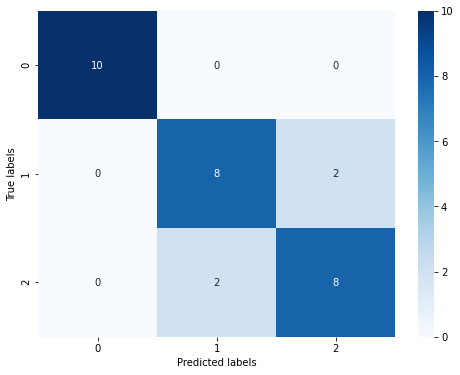

In [31]:
## 查看混淆矩阵
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()